## import libraries

In [1]:
import time

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier 

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 


import warnings
warnings.filterwarnings("ignore")

## load dataset

In [2]:
# load random oversampling data
X_ros_train = pd.read_csv('data/ros/X_ros_train.csv')
X_ros_test = pd.read_csv('data/ros/X_ros_test.csv')

y_ros_train = pd.read_csv('data/ros/y_ros_train.csv')
y_ros_test = pd.read_csv('data/ros/y_ros_test.csv')

## create best candidate models

In [3]:
## logistic regression model ##
C_lr = 5
SOLVER = 'saga'
PENALTY_lr = 'l2'
MAX_ITER = 100
model_log_reg = LogisticRegression(
    multi_class='ovr', C=C_lr, solver=SOLVER, penalty=PENALTY_lr, 
    max_iter=MAX_ITER, random_state=7)

## KNN model ##
K =  5 # number of neighbors
WEIGHTS = 'uniform' # weights 
ALGORITHM = 'auto'
model_knn = KNeighborsClassifier(n_neighbors=K, weights=WEIGHTS, algorithm=ALGORITHM)

## SVM model ##
C_svm = 1
LOSS = 'hinge'
PENALTY_svm = 'l2'
model_linear_svc = LinearSVC(C=C_svm, loss=LOSS, penalty=PENALTY_svm,  
                                class_weight='balanced', random_state=7)

## Decision tree model ##
MAX_FEATURES_dct = None 
MIN_SAMPLE_LEAF = 5
MAX_DEPTH_dct = 20 
SPLITTER = 'best'
model_dtc = DecisionTreeClassifier(
    splitter=SPLITTER, max_depth=MAX_DEPTH_dct, 
    min_samples_leaf=MIN_SAMPLE_LEAF, 
    max_features=MAX_FEATURES_dct, random_state=7)

## Random forest model ##
N_ESTIMATOR_rf = 10
MAX_FEATURES_rf = 'log2'
model_rf = RandomForestClassifier(
    n_estimators=N_ESTIMATOR_rf, max_features=MAX_FEATURES_rf, random_state=7
)

## XGBoost model ##
N_ESTIMATOR_xgb = 195
MAX_DEPTH_xgb = 22
MIN_CHILD_WEIGHT_xgb = 1 # default 
model_xgboost = XGBClassifier(
    n_estimators=N_ESTIMATOR_xgb, max_depth=MAX_DEPTH_xgb, 
    min_child_weight =MIN_CHILD_WEIGHT_xgb, random_state=7)

In [4]:
list_model_names = ['Logistic regression', 'KNN', 'SVM(linear svc)', 'Decision tree', 'Random forest', 'XGBoost']
list_models = [model_log_reg, model_knn, model_linear_svc, model_dtc, model_rf, model_xgboost]
list_training_duration = []
list_prediction_duration = []
list_accuracy = []
list_tpr = []
list_tnr = []
list_f1_score = []

In [5]:
for model in list_models:
    # model training
    start = time.time()
    model.fit(X_ros_train, y_ros_train) # train the model
    end = time.time()
    duration = end - start
    list_training_duration.append(duration)

    # model prediction of true labels
    start = time.time()
    y_pred = model.predict(X_ros_test) # predict true labels
    end = time.time()
    duration = end - start
    list_prediction_duration.append(duration)
    
    # model accuracy
    accuracy = accuracy_score(y_true=y_ros_test, y_pred=y_pred)
    list_accuracy.append(accuracy)

    # confusion matrix
    cf_matrix = confusion_matrix(y_true=y_ros_test, y_pred=y_pred)
    tn = cf_matrix.flatten()[0] # true negative
    fp = cf_matrix.flatten()[1] # false positive
    fn = cf_matrix.flatten()[2] # false negative
    tp = cf_matrix.flatten()[3] # true positive
    
    tpr = (tp / (tp + fn)) * 100
    tnr = (tn / (tn + fp)) * 100
    list_tpr.append(tpr)
    list_tnr.append(tnr)

    f1_score = tp / (tp + ((fp+fn)/2))
    list_f1_score.append(f1_score)

    

## compare models performances
#### (finding the best algorithm)

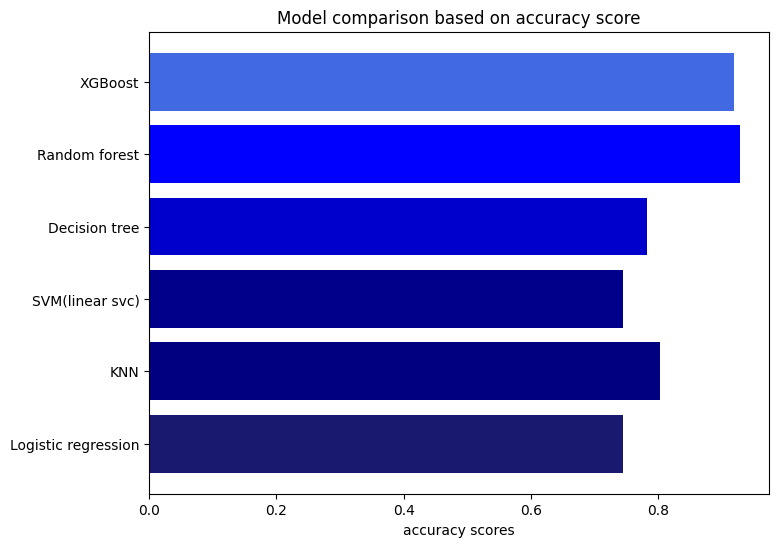

In [65]:
# compare models accuracy score
plt.rcParams['figure.figsize'] = (8, 6)
plt.barh(list_model_names, list_accuracy, color=['midnightblue', 'navy','darkblue','mediumblue','blue','royalblue'])
plt.xlabel("accuracy scores")
plt.title("Model comparison based on accuracy score")
plt.xticks(fontsize=10)
plt.show()

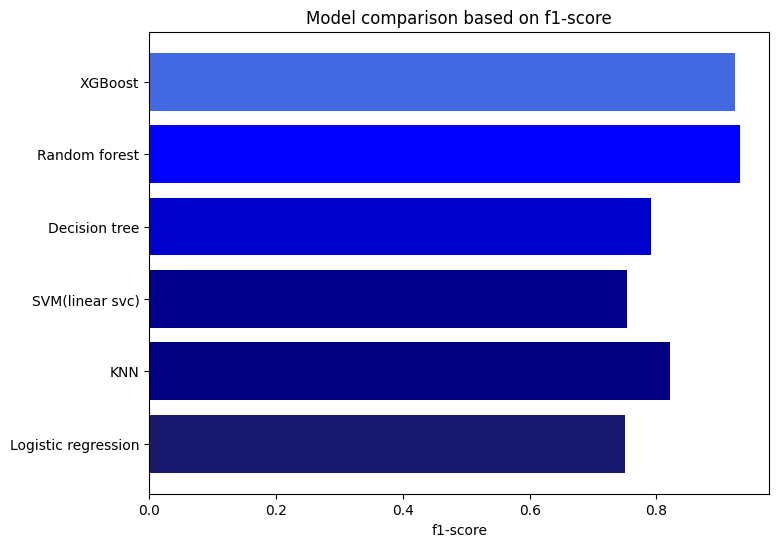

In [70]:
# compare models based on f1-score 
plt.rcParams['figure.figsize'] = (8, 6)
plt.barh(list_model_names, list_f1_score, color=['midnightblue', 'navy','darkblue','mediumblue','blue','royalblue'])
plt.xlabel("f1-score")
plt.title("Model comparison based on f1-score")
plt.xticks(fontsize=10)
plt.show()

as the plots shows, random forest has the highest accuracy score and f1-score and XGBoost comes in the 2nd place.

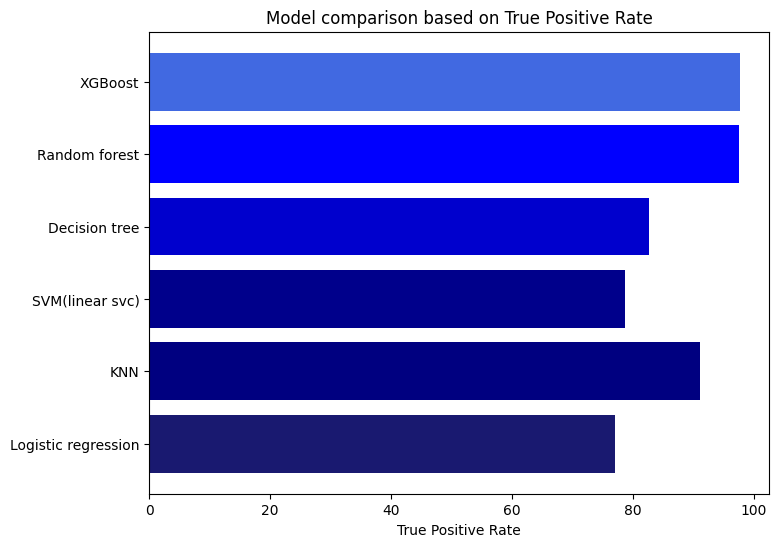

In [63]:
# compare models based on true positive rate 
plt.rcParams['figure.figsize'] = (8, 6)
plt.barh(list_model_names, list_tpr, color=['midnightblue', 'navy','darkblue','mediumblue','blue','royalblue'])
plt.xlabel("True Positive Rate")
plt.title("Model comparison based on True Positive Rate")
plt.xticks(fontsize=10)
plt.show()

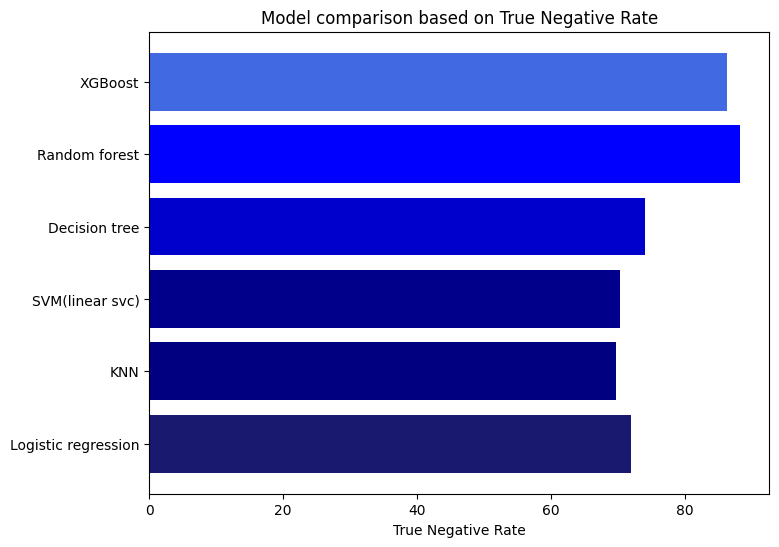

In [66]:
# compare models based on true negative rate 
plt.rcParams['figure.figsize'] = (8, 6)
plt.barh(list_model_names, list_tnr, color=['midnightblue', 'navy','darkblue','mediumblue','blue','royalblue'])
plt.xlabel("True Negative Rate")
plt.title("Model comparison based on True Negative Rate")
plt.xticks(fontsize=10)
plt.show()

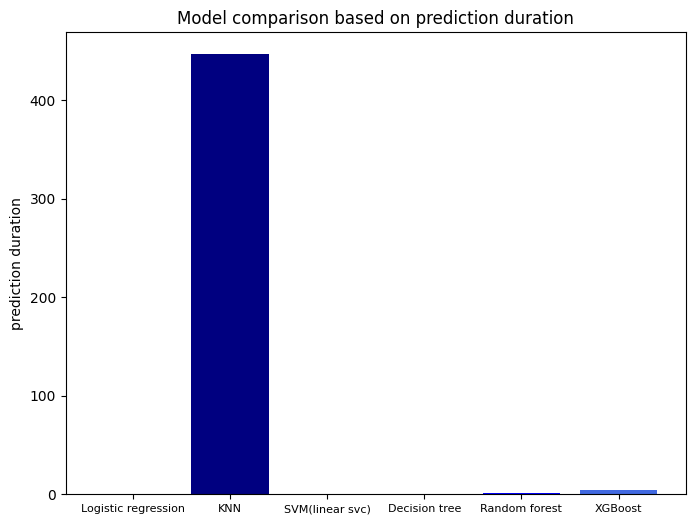

[0.10238051414489746, 446.63753056526184, 0.10772132873535156, 0.16359806060791016, 1.0804998874664307, 4.817432880401611]


In [68]:
# compare models based on prediction duration
plt.rcParams['figure.figsize'] = (8, 6)
plt.bar(list_model_names, list_prediction_duration, 
    color=['midnightblue', 'navy','darkblue','mediumblue','blue','royalblue'])
plt.ylabel("prediction duration")
plt.title("Model comparison based on prediction duration")
plt.xticks(fontsize=8)
plt.show()
print(list_prediction_duration)

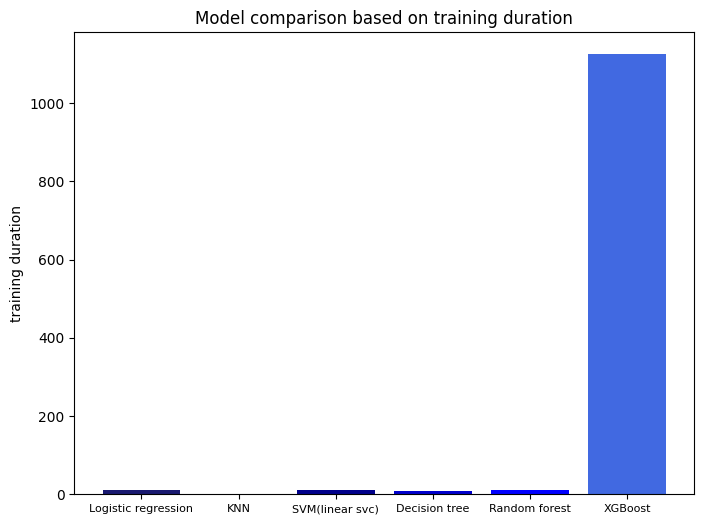

[12.111721515655518, 0.3457362651824951, 10.784157752990723, 8.766705751419067, 10.599108219146729, 1125.3096306324005]


In [69]:
# compare models based on training duration
plt.rcParams['figure.figsize'] = (8, 6)
plt.bar(list_model_names, list_training_duration, 
    color=['midnightblue', 'navy','darkblue','mediumblue','blue','royalblue'])
plt.ylabel("training duration")
plt.title("Model comparison based on training duration")
plt.xticks(fontsize=8)
plt.show()
print(list_training_duration)

comparing models training and prediction duration shows that however KNN has the smallest training duration but it has the highest prediction duration. this shows that how KNN memorizes and is a lazy learner. In addition XGBoost classifier has the highest training duration. 

In [98]:
print('accuracy | f1-score | TPR | TNR \n')
for i in range(0, len(list_model_names)):
    print(f'{list_model_names[i]}') 
    print(f'{round(list_accuracy[i], 2)} \t {round(list_f1_score[i], 2)} \t {round(list_tpr[i])}% \t {round(list_tnr[i])}% ')
    print()


accuracy | f1-score | TPR | TNR 

Logistic regression
0.74 	 0.75 	 77% 	 72% 

KNN
0.8 	 0.82 	 91% 	 70% 

SVM(linear svc)
0.74 	 0.75 	 79% 	 70% 

Decision tree
0.78 	 0.79 	 83% 	 74% 

Random forest
0.93 	 0.93 	 98% 	 88% 

XGBoost
0.92 	 0.92 	 98% 	 86% 



it is conducted that the random forest model comes first. however it can predict positive class very well (high tpr) but it could do better predicting the negative class. then comes the XGBoost model close to the random forest. KNN comes in the 3rd place, however it can predict the positive class well, but it could do better to predict the negative class. 

## save the model

In [100]:
import pickle 

# save random forest model
path = 'saved_models/model_rf.sav'
pickle.dump(model_rf, open(path, 'wb'))

# save XGBoost model
path = 'saved_models/model_xgboost.sav'
pickle.dump(model_xgboost, open(path, 'wb'))